In [9]:
from __future__ import print_function
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [10]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)


(32, 32, 3)

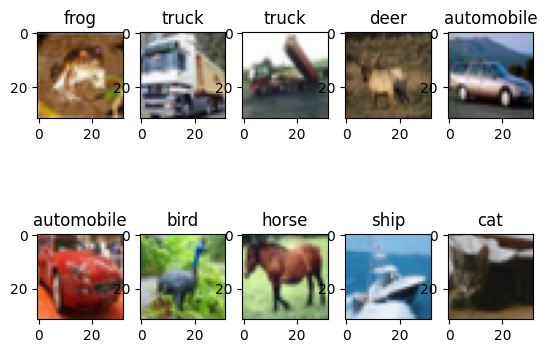

In [12]:
import matplotlib.pyplot as plt

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
for i in range(10):
    #plt.figure(figsize=(20,20))
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i][0]])

x_train[0].shape

In [13]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [23]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [18]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.8329 - accuracy: 0.3453 - val_loss: 1.4344 - val_accuracy: 0.4881
Epoch 2/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4752 - accuracy: 0.4704 - val_loss: 1.3112 - val_accuracy: 0.5390
Epoch 3/20
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3185 - accuracy: 0.5309 - val_loss: 1.1862 - val_accuracy: 0.5851
Epoch 4/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2065 - accuracy: 0.5728 - val_loss: 1.0799 - val_accuracy: 0.6226
Epoch 5/20
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1257 - accuracy: 0.6036 - val_loss: 1.0056 - val_accuracy: 0.6462
Epoch 6/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0582 - accuracy: 0.6276 - val_loss: 0.9532 - val_accuracy: 0.6658
Epoch 7/20
1563/1563 [==============================] - 49s 32ms/step - loss: 1.0077 - accuracy: 0.6452 - val_loss: 0.9892 -

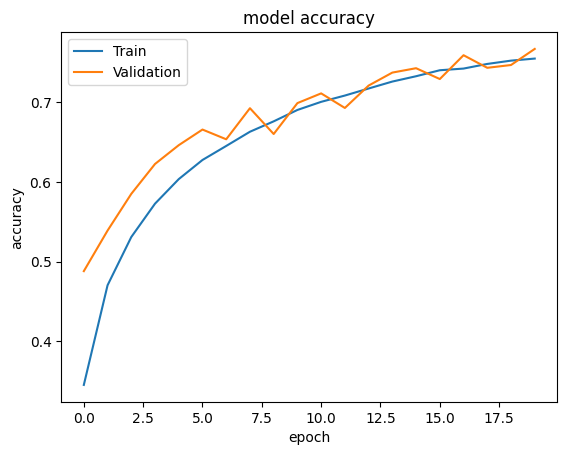

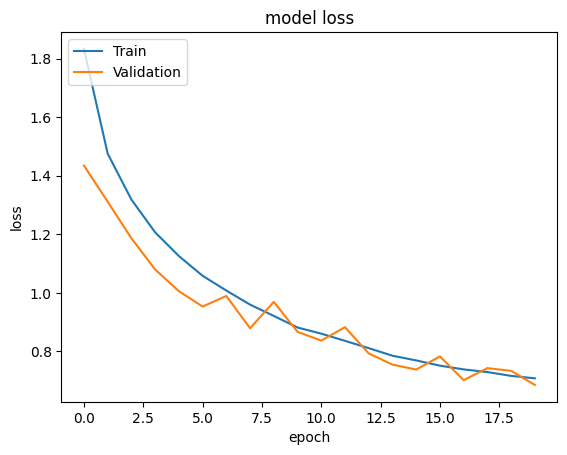

In [21]:
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()